In [6]:
import numpy as np
from numpy import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [7]:
a = 0.005
b = -1.9343
c = 2.14
d = 4.3

def d_f__d_x(x, a=a, b=b, c=c, d=d):
    """
    Calculates the derivative of ax^2(x-c)^2(x-b)^3(x-d)^3
    
    Parameters:
        x: point at which to evaluate derivative
        a, b, c, d: coefficients (default to 1)
    """
    # Breaking down the function into parts for clarity
    # f(x) = ax^2 * (x-c)^2 * (x-b)^3 * (x-d)^3
    
    # Using the product rule repeatedly
    term1 = 2 * x                      # derivative of x^2
    term2 = (x - c) ** 2              # (x-c)^2
    term3 = (x - b) ** 3              # (x-b)^3
    term4 = (x - d) ** 3              # (x-d)^3
    
    term5 = x ** 2                     # x^2
    term6 = 2 * (x - c)               # derivative of (x-c)^2
    
    term7 = x ** 2                     # x^2
    term8 = (x - c) ** 2              # (x-c)^2
    term9 = 3 * (x - b) ** 2          # derivative of (x-b)^3
    
    term10 = x ** 2                    # x^2
    term11 = (x - c) ** 2             # (x-c)^2
    term12 = (x - b) ** 3             # (x-b)^3
    term13 = 3 * (x - d) ** 2         # derivative of (x-d)^3
    
    # Combining all terms using the product rule
    derivative = a * (
        term1 * term2 * term3 * term4 +    # derivative of x^2 term
        term5 * term6 * term3 * term4 +    # derivative of (x-c)^2 term
        term7 * term8 * term9 * term4 +    # derivative of (x-b)^3 term
        term10 * term11 * term12 * term13  # derivative of (x-d)^3 term
    )
    
    return derivative


In [8]:
def euler_maruyama_EM(X0, dt, epsilon, U_prime, num_steps, num_trajectories):

    if num_trajectories == 1:
        X = np.zeros(num_steps + 1)
    else:
        X = np.zeros((num_steps + 1, num_trajectories))
    
    # Set initial condition
    X[0] = X0
    
    for n in range(num_steps):
        
        drift = -U_prime(X[n] )
        
        dW = np.sqrt(dt) * np.random.randn(num_trajectories) if num_trajectories > 1 else np.sqrt(dt) * np.random.randn()
        
        X[n+1] = X[n]  + drift * dt + np.sqrt(epsilon) * dW
    
    return X

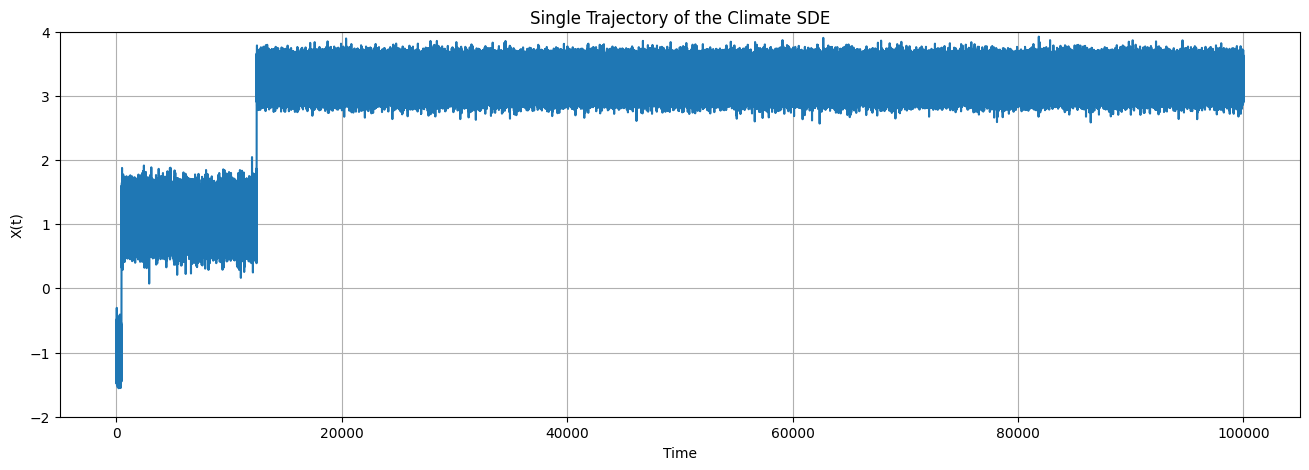

In [32]:
X0 = -1.0
dt = 0.01
T = 100000
epsilon = 1
num_steps = int(T/dt)
num_trajectories = 1

X_em = euler_maruyama_EM(X0, dt, epsilon, d_f__d_x, num_steps, num_trajectories)

time = np.linspace(0, T, num_steps+1)

plt.figure(figsize=(16, 5))
plt.plot(time, X_em)
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Single Trajectory of the Climate SDE")
plt.ylim(-2, 4)
plt.grid()
plt.show()